In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import cv2
import numpy as np
from data_utils import JeongganboReader
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [43]:
# image_path = 'haegeum_example.png'
# image_path = 'haegeum_pg-042.png'
image_path = 'haegeum_pg-054.png'
# image_path = 'haegeum_pg-150.png'
# image_path = 'haegeum_pg-107.png'
# image_path = 'haegeum_pg-236.png'

reader = JeongganboReader()
page = reader(image_path)
# page.jeonggan_list
page.gaks

[Jangdan Gak at Row 0 (1540, 459) with 20 jeonggans. Avg height: 119.45,
 Gak at Row 0 (1359, 459) with 20 jeonggans. Avg height: 119.45, Start Beat: 0,
 Gak at Row 0 (1179, 459) with 20 jeonggans. Avg height: 119.45, Start Beat: 0,
 Gak at Row 0 (999, 459) with 20 jeonggans. Avg height: 118.95, Start Beat: 0,
 Gak at Row 0 (819, 459) with 20 jeonggans. Avg height: 119.45, Start Beat: 0,
 Gak at Row 0 (639, 459) with 20 jeonggans. Avg height: 119.45, Start Beat: 0,
 Gak at Row 0 (459, 459) with 20 jeonggans. Avg height: 119.45, Start Beat: 0,
 Gak at Row 0 (279, 459) with 20 jeonggans. Avg height: 118.95, Start Beat: 0]

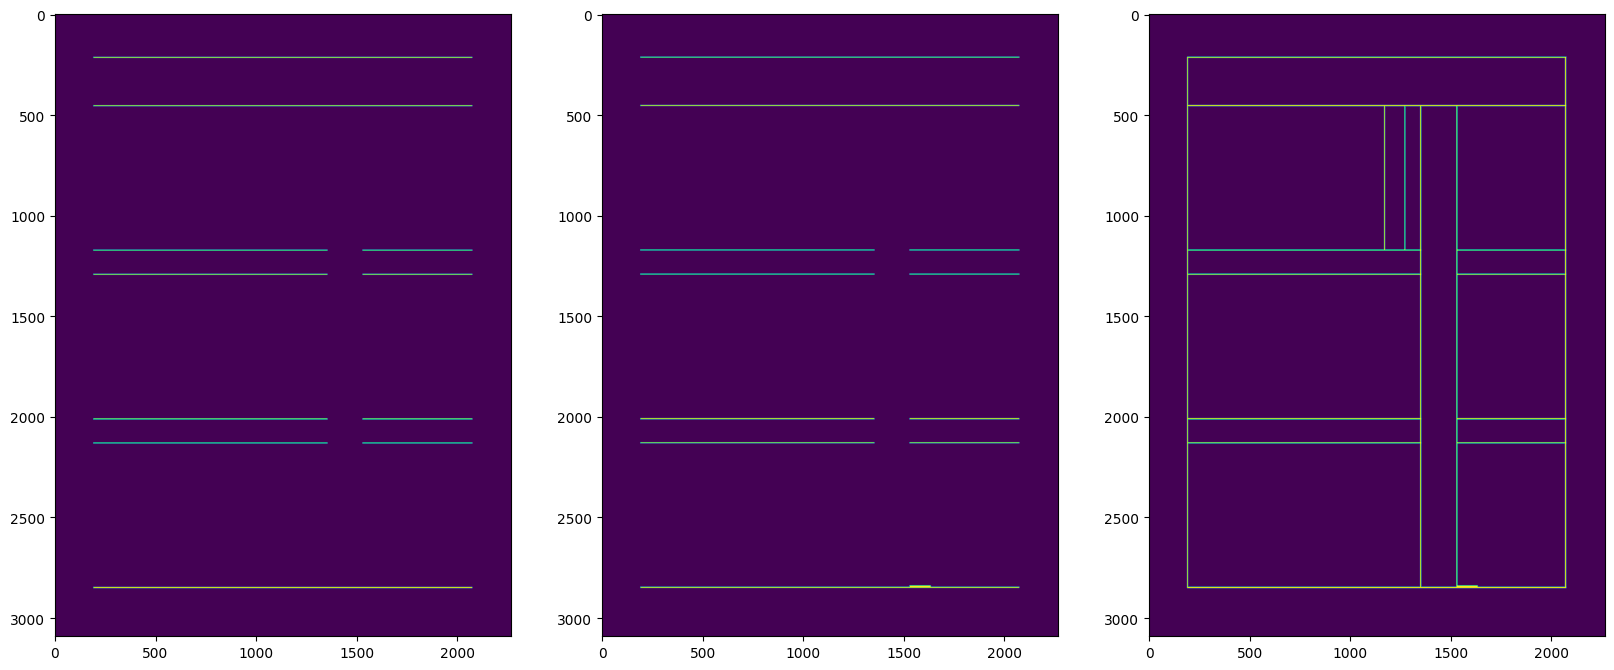

In [30]:
image = page.img
self = JeongganboReader()

img_bin = self._process_img(image)
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.thick_kernel_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.thick_kernel_v)
img_bin_final = img_bin_h + img_bin_v 

img_bin_h_alt = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.thick_kernel_h_alt)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img_bin_h_alt)
plt.subplot(1,3,2)
plt.imshow(img_bin_h)
plt.subplot(1,3,3)
plt.imshow(img_bin_final+img_bin_h_alt)
# boxes, _ = self._get_thick_lines(img_bin)
# boxes = self._detect_title_box(boxes)


# print(f"{len(boxes)} Title box detected at {image_path}")
# box = boxes[0]
# out = image[box[1]:box[1]+box[3], box[0]:box[0]+box[2]]


In [28]:
img_bin_h[:, 300].max(), img_bin_h_alt[:, 300].max()

(255, 255)

In [23]:
print(np.where(img_bin_h[:, 300]))

print(np.where(img_bin_h_alt[:, 300]))

(array([ 212,  213,  214,  215,  216,  452,  453,  454,  455,  456, 1170,
       1171, 1172, 1173, 1174, 1290, 1291, 1292, 1293, 1294, 2008, 2009,
       2010, 2011, 2012, 2013, 2128, 2129, 2130, 2131, 2132, 2846, 2847,
       2848, 2849, 2850, 2851]),)
(array([ 213,  214,  215,  216,  217,  453,  454,  455,  456,  457, 1171,
       1172, 1173, 1174, 1175, 1291, 1292, 1293, 1294, 1295, 2009, 2010,
       2011, 2012, 2013, 2014, 2129, 2130, 2131, 2132, 2133, 2847, 2848,
       2849, 2850, 2851, 2852]),)


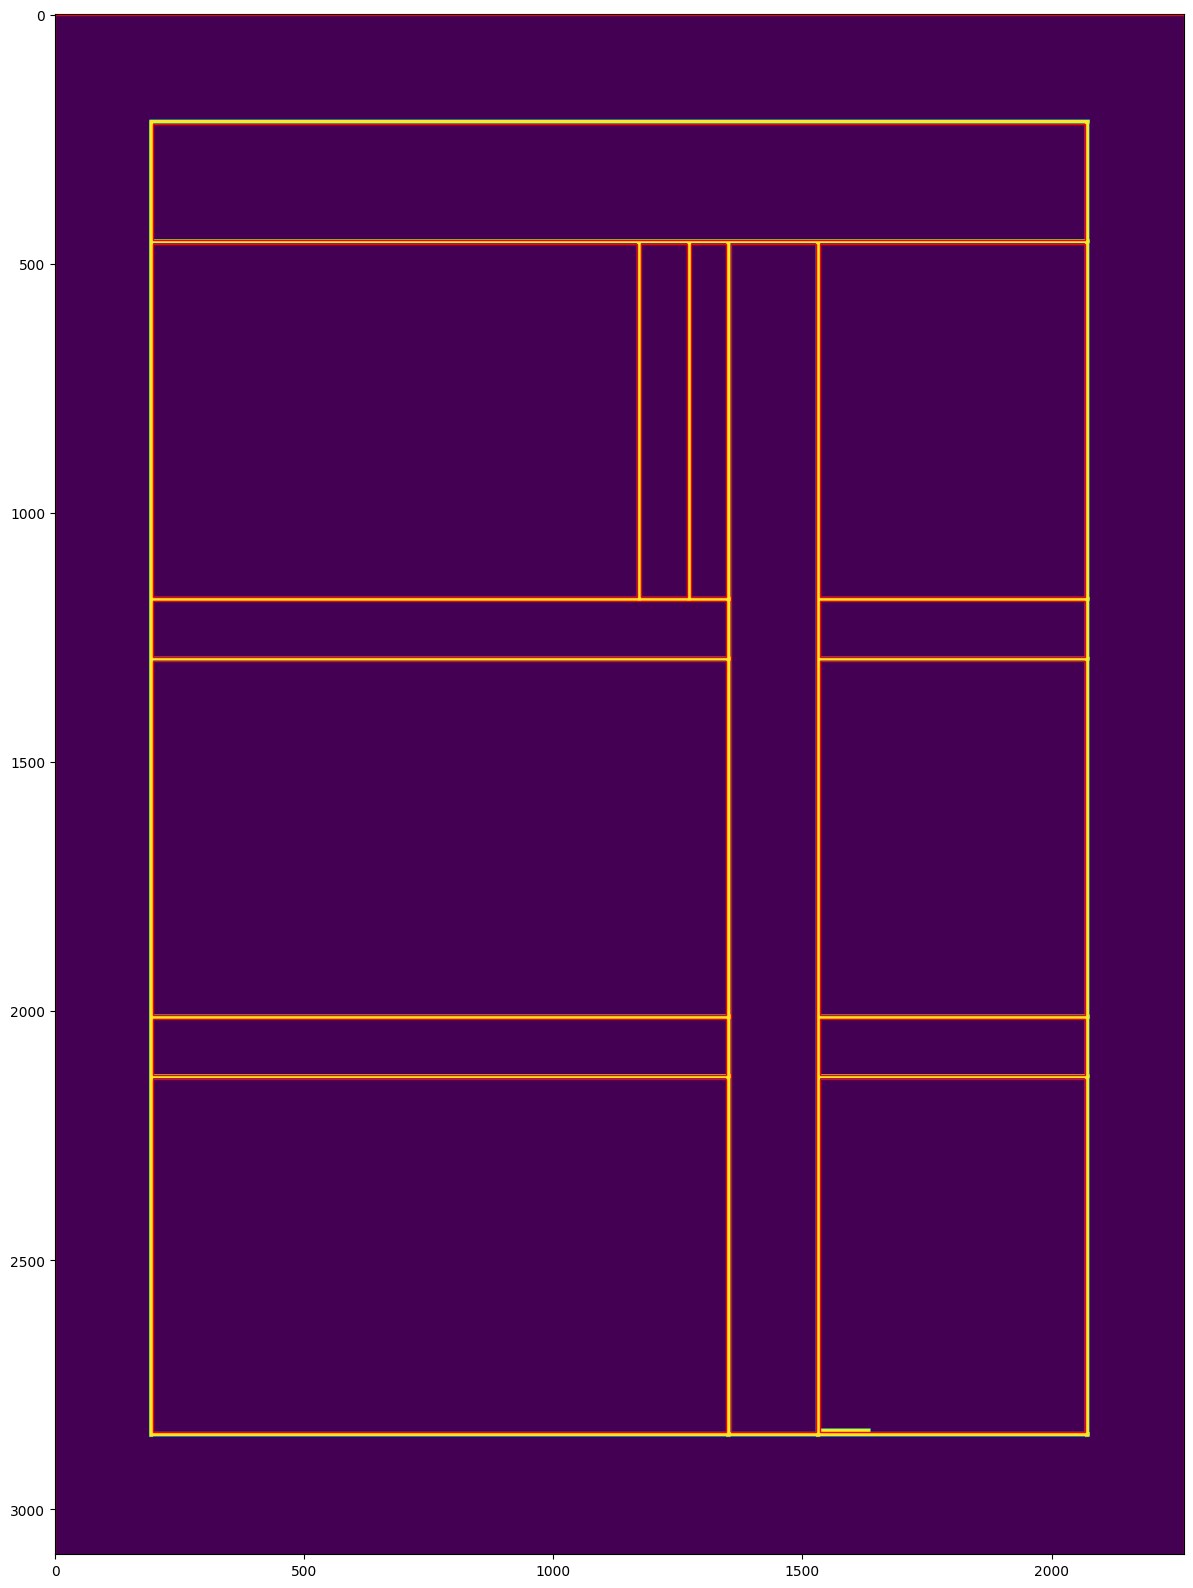

In [25]:


# img_bin_final = cv2.dilate(img_bin_final + img_bin_h_alt, self.final_kernel, iterations=1)
img_bin_final = cv2.dilate(img_bin_final, self.final_kernel, iterations=1)

_, _, boxes, _ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=4, ltype=cv2.CV_32S)



plt.figure(figsize=(20,20))
plt.imshow(img_bin_final)
for box in boxes[1:]:
    x, y, w, h, area = box
    if area < 1000:
        continue
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)

In [ ]:
box

In [ ]:
plt.imshow(image)

In [ ]:
plt.imshow(out)

In [ ]:
[[gak.org_x, gak.org_y, gak.w, gak.h] for gak in page.gaks]

In [ ]:
page.thick_boxes[4:5]

In [192]:
page[0].img.shape

(3091, 739, 3)

In [ ]:
[[gak.org_x, gak.org_y, gak.w, gak.h] for gak in page.gaks]

In [ ]:
# image_path = 'haegeum_example.png'
# image_path = 'haegeum_pg-042.png'
image_path = 'haegeum_pg-150.png'
# image_path = 'haegeum_pg-107.png'


reader = JeongganboReader()
image = reader.detect_title_box_from_img_path(image_path)

plt.imshow(image)

In [ ]:
page.img

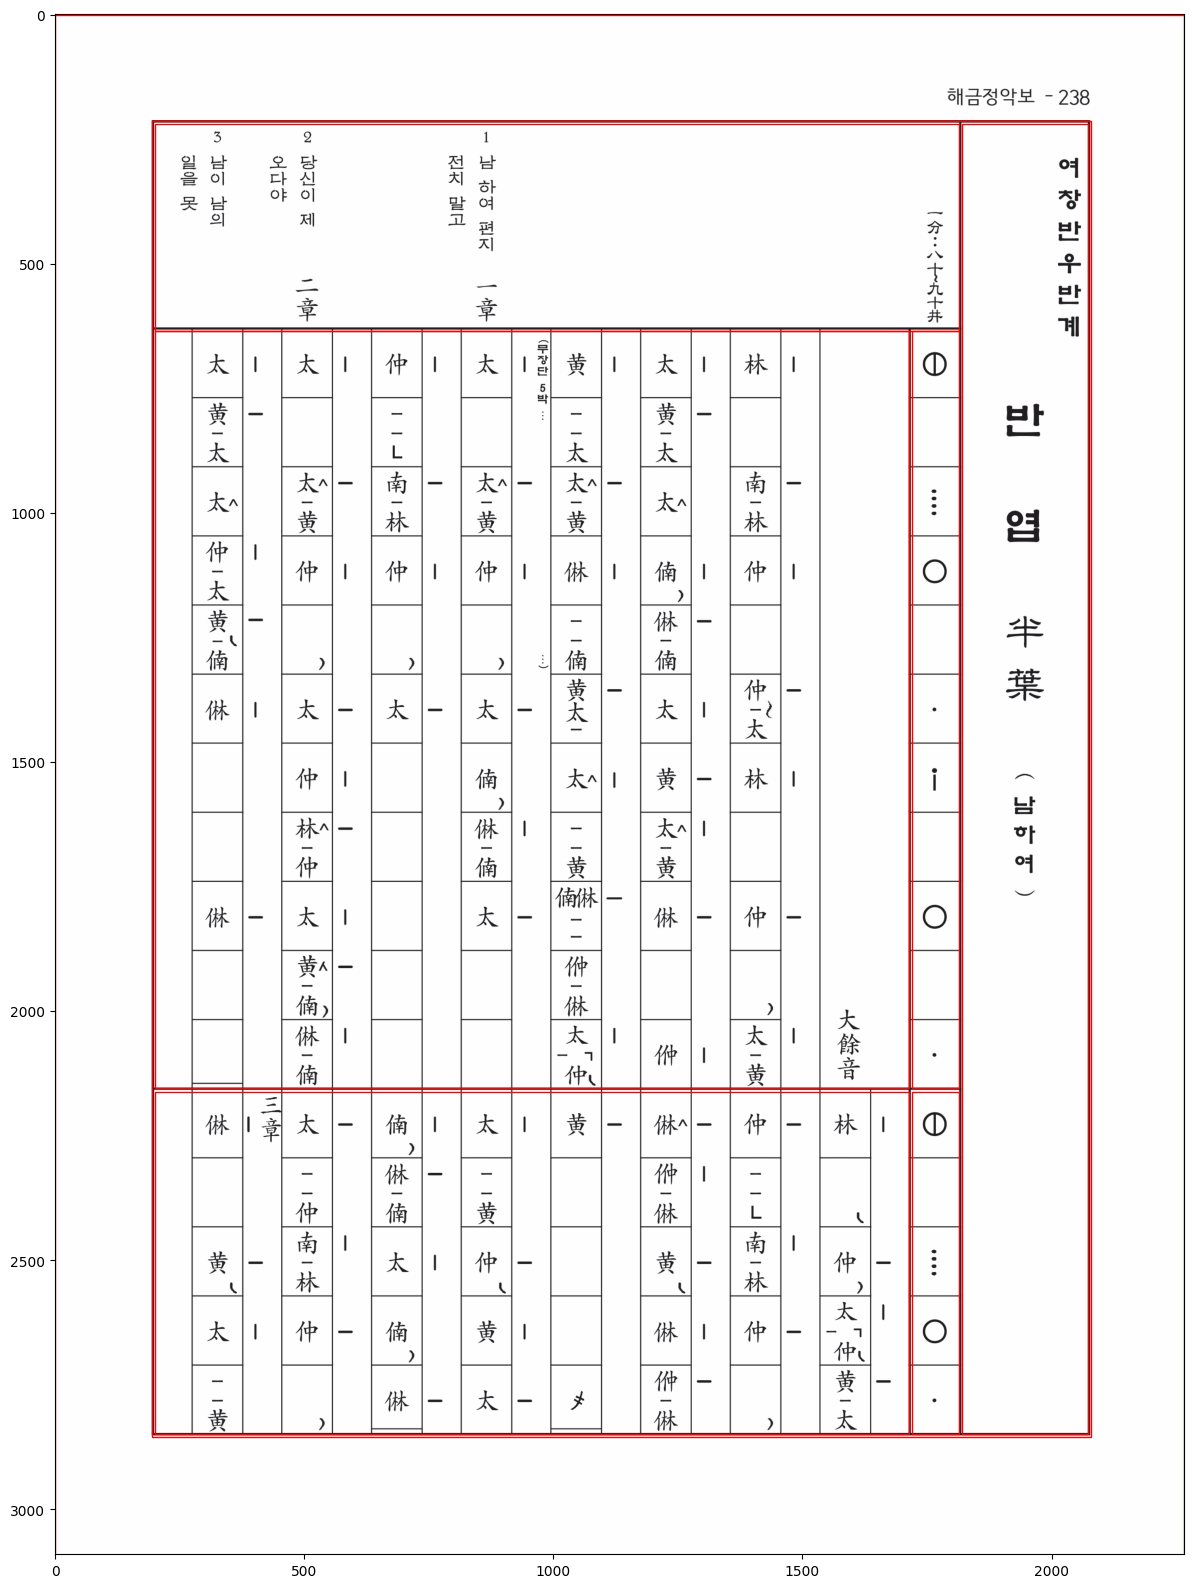

In [32]:

# plot image and boxes
# boxes: np.ndarray of [x, y, w, h, area]

# image_path = 'haegeum_pg-107.png'
image_path = 'haegeum_pg-236.png'

reader = JeongganboReader()
page = reader(image_path)

if isinstance(page, tuple):
    page = page[1]

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(page.img)

for box in page.thick_boxes:
    x, y, w, h, area = box
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


In [ ]:
# Jeonggan at (998, 1328) with size (99, 122)
# 278 459 99 115


In [ ]:
len(boxes)

In [ ]:
# Jeonggan at (998, 1328) with size (99, 122)
# 278 459 99 115


In [ ]:
reader = JeongganboReader()
image, (boxes, h_contours, v_contours) = reader(image_path)

# h_contours: List of cv2.boundingRect

# plot image and h_contours
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(image)

for box in boxes[4:5]:
    x, y, w, h, area = box
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    

In [ ]:
h_contours

In [ ]:
len(h_contours)

In [1]:
page.new_gak_start_y_pos

NameError: name 'page' is not defined

In [ ]:
# Jeonggan at (998, 1328) with size (99, 122)
# 278 459 99 115


In [ ]:
import matplotlib.pyplot as plt
image = cv2.imread(image_path)

plt.imshow(image[459:459+115, 278:278+99, :])

In [ ]:
[x.h for x in page.jeonggan_list]

In [ ]:
page.gak

In [ ]:
import cv2
import numpy as np
from data_utils import *

# read image
image_path = 'haegeum_example.png'
image = cv2.imread(image_path)

# convert to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
img_bin = 255 - img_bin

line_min_length = 30
line_min_thickness = 2

kernel_h = np.ones((line_min_thickness, line_min_length), np.uint8)
kernel_v = np.ones((line_min_length, line_min_thickness), np.uint8)

img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_v)

img_bin_final = img_bin_h + img_bin_v

final_kernel = np.ones((2, 2), np.uint8)
img_bin_final = cv2.dilate(img_bin_final, final_kernel, iterations=1)

_, labels, stats, _ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=4, ltype=cv2.CV_32S)




In [ ]:
JG_MIN_AREA = 8000
JG_MAX_AREA = 20000
JG_MIN_WIDTH = 92
JG_MAX_WIDTH = 102



In [ ]:
is_large_enough = stats[:,-1] > 8000
is_small_enough = stats[:,-1] < 20000

jeonggan_cells = stats[is_large_enough & is_small_enough]
min_wdith, max_width, min_height, max_height = jeonggan_cells[:,2].min(), jeonggan_cells[:,2].max(), jeonggan_cells[:,3].min(), jeonggan_cells[:,3].max()
min_wdith, max_width, min_height, max_height

In [ ]:
jeonggan_cells

In [ ]:
jeonggan_x_positions = np.unique(jeonggan_cells[:, 0])
jeonggan_y_positions = np.unique(jeonggan_cells[:, 1])

jeonggan_x_positions, jeonggan_y_positions

x_interval = np.diff(jeonggan_x_positions)
y_interval = np.diff(jeonggan_y_positions)
x_interval, y_interval

In [ ]:
jeonggan_boxes = jeonggan_cells

jeonggan_list = [{'x': x, 'y': y, 'width': w, 'height': h} for x, y, w, h in jeonggan_boxes[:,:-1]]

jeonggan_list.sort(key=lambda x: (-x['x'], x['y'])) 

In [ ]:
jeonggan_list

In [ ]:
for x,y,w,h in jeonggan_boxes:
  print(x,y,w,h)

In [ ]:
jeonggan_boxes.sort(axis=0, descending=True)
jeonggan_boxes

In [ ]:
# def get_clean_y_positions(y_positions:np.ndarray):


In [ ]:
jeonggan_y_positions

In [ ]:
other_cells = stats[~(is_large_enough & is_small_enough)]
MIN_SIZE = 1000
MAX_SIZE = 100000
other_cells = other_cells[other_cells[:,-1] > MIN_SIZE]
other_cells = other_cells[other_cells[:,-1] < MAX_SIZE]

len(other_cells)

In [ ]:
other_cells

In [ ]:
import matplotlib.pyplot as plt


# plt.figure(figsize=(30, 10))
# for i, (x, y, w, h, area) in enumerate(other_cells[:20], start=1):
#   plt.subplot(1, 20, i)
#   plt.imshow(image[y:y+h, x:x+w])
